In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes(as_frame=True)
data, target = dataset.data, dataset.target
print(data.shape)

(442, 10)


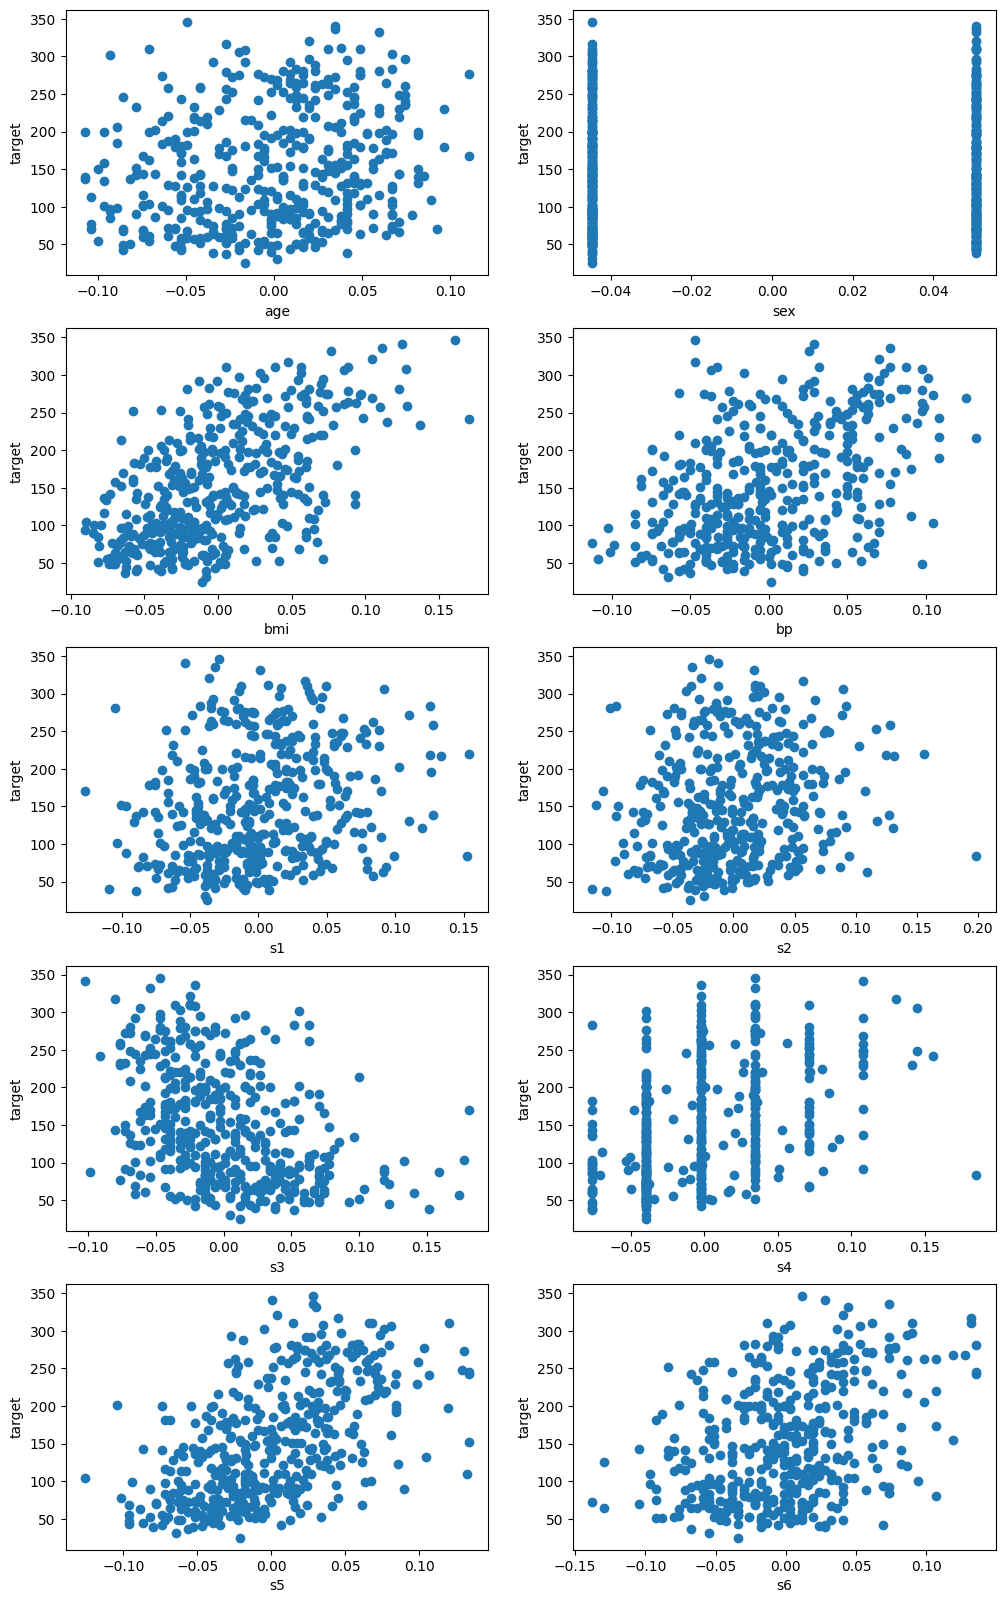

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()
for i, feature in enumerate(data.columns):
    axes[i].scatter(data.iloc[:, i], target)
    axes[i].set_ylabel('target')
    axes[i].set_xlabel(feature)

it seems like linear dependence

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

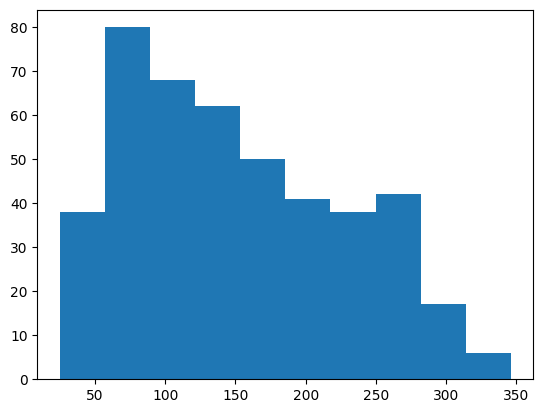

In [4]:
plt.hist(target)

the distribution is skewed to the right

{'whiskers': [<matplotlib.lines.Line2D at 0x258029f0c20>,
 'caps': [<matplotlib.lines.Line2D at 0x25802a1aea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25802a1a780>],
 'medians': [<matplotlib.lines.Line2D at 0x25802a1b2f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25802a1b5c0>],
 'means': []}

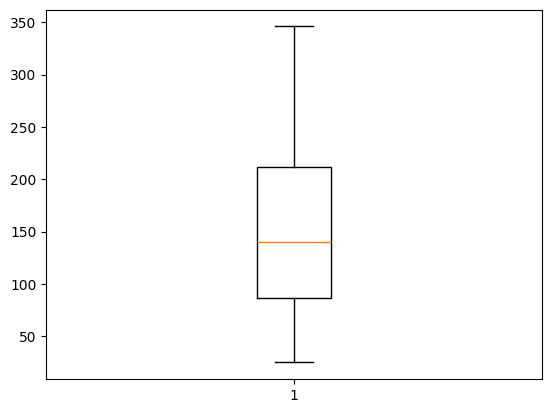

In [5]:
plt.boxplot(target)

Boxplot additionally confirms that the distribution is skewed to the right.
I think GammaRegressor will fit here better than other linear models.

In [9]:
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
X, y = data.to_numpy(),target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GammaRegressor()

param_grid = {
    'alpha': [0.001, 0.01, 0.1,  1, 10]    
}

cv= GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
cv.fit(X_train, y_train)
print('best params', cv.best_params_)
print('best mae', -cv.best_score_)

best params {'alpha': 0.001}
best mae 46.20724693571175


Text(0, 0.5, 'resuidals')

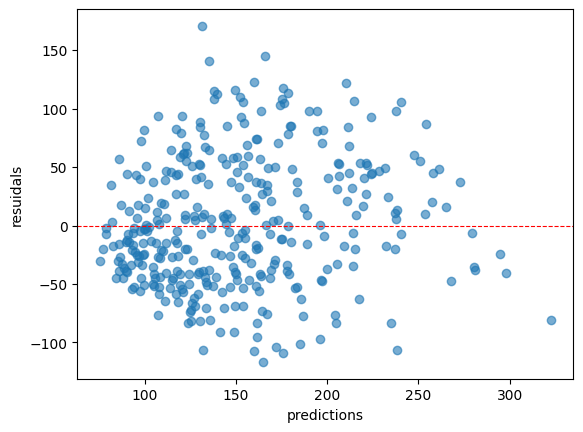

In [ ]:
y_pred_train = cv.best_estimator_.predict(X_train)
resuidals = y_train - y_pred_train
plt.scatter(y_pred_train, resuidals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.8, label='Zero resuidal') 
plt.xlabel('predictions')
plt.ylabel('resuidals')

(array([ 1.,  5.,  3.,  2.,  6.,  7.,  7.,  6., 18., 17., 26., 15., 18.,
        17., 17., 19., 13., 18., 14.,  9.,  5., 16., 14., 17., 11.,  6.,
         5.,  9.,  6.,  8.,  4.,  5.,  4.,  2.,  0.,  1.,  1.,  0.,  0.,
         1.]),
 array([-116.60642472, -109.4245061 , -102.24258748,  -95.06066886,
         -87.87875025,  -80.69683163,  -73.51491301,  -66.33299439,
         -59.15107578,  -51.96915716,  -44.78723854,  -37.60531992,
         -30.42340131,  -23.24148269,  -16.05956407,   -8.87764545,
          -1.69572684,    5.48619178,   12.6681104 ,   19.85002902,
          27.03194763,   34.21386625,   41.39578487,   48.57770349,
          55.75962211,   62.94154072,   70.12345934,   77.30537796,
          84.48729658,   91.66921519,   98.85113381,  106.03305243,
         113.21497105,  120.39688966,  127.57880828,  134.7607269 ,
         141.94264552,  149.12456413,  156.30648275,  163.48840137,
         170.67031999]),
 <BarContainer object of 40 artists>)

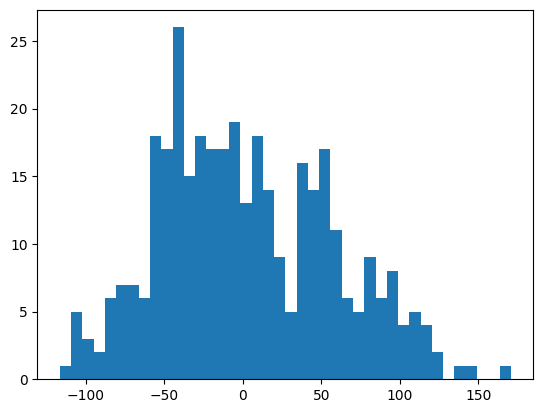

In [17]:
plt.hist(resuidals, bins=40)

In [18]:
y_pred= cv.best_estimator_.predict(X_test)
print('mae on test', mean_absolute_error(y_test, y_pred))
print('r2 on test', r2_score(y_test, y_pred))
print('r2 on train', r2_score(y_train, cv.best_estimator_.predict(X_train)))

mae on test 43.81629997793034
r2 on test 0.4471214631519317
r2 on train 0.49995461103351146


GammaRegressor copped with the task well

Gaussian distribution

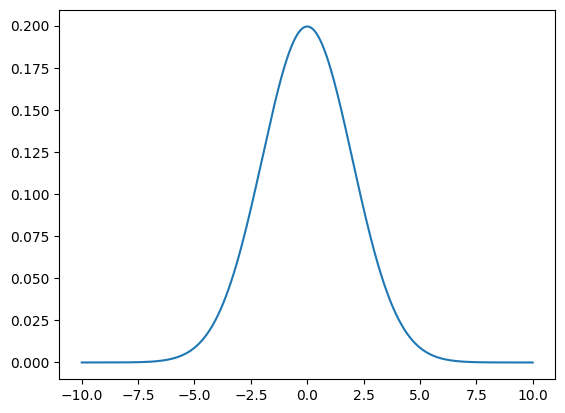

In [7]:
from scipy import stats 

x =np.linspace(-10, 10, 1000)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=2))

Exponential

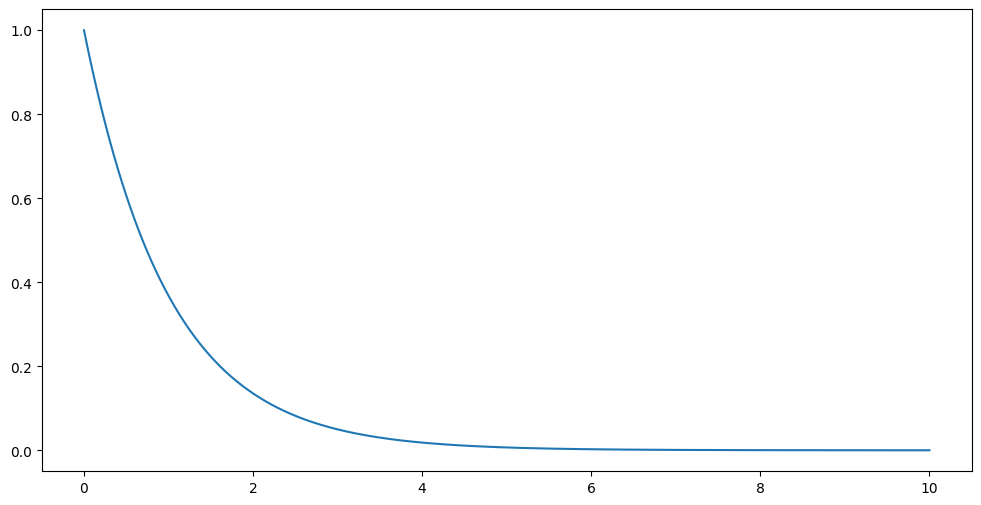

In [43]:
x = np.linspace(0, 10, 1000) 

plt.figure(figsize=(12, 6))

plt.plot(x, stats.expon.pdf(x, scale=1))